<a href="https://colab.research.google.com/github/birkenkrahe/notebooksf21/blob/main/ggplot2_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grammar of graphics and `ggplot2`

## What will you learn?
- Quick plots
- Components of a graph
- Plot objects and piping
- Geometries
- Aesthetic mappings
- Layers
- Scales
- Labels and titles
- Categories as colors
- Putting it all together

Our final result will look like this:

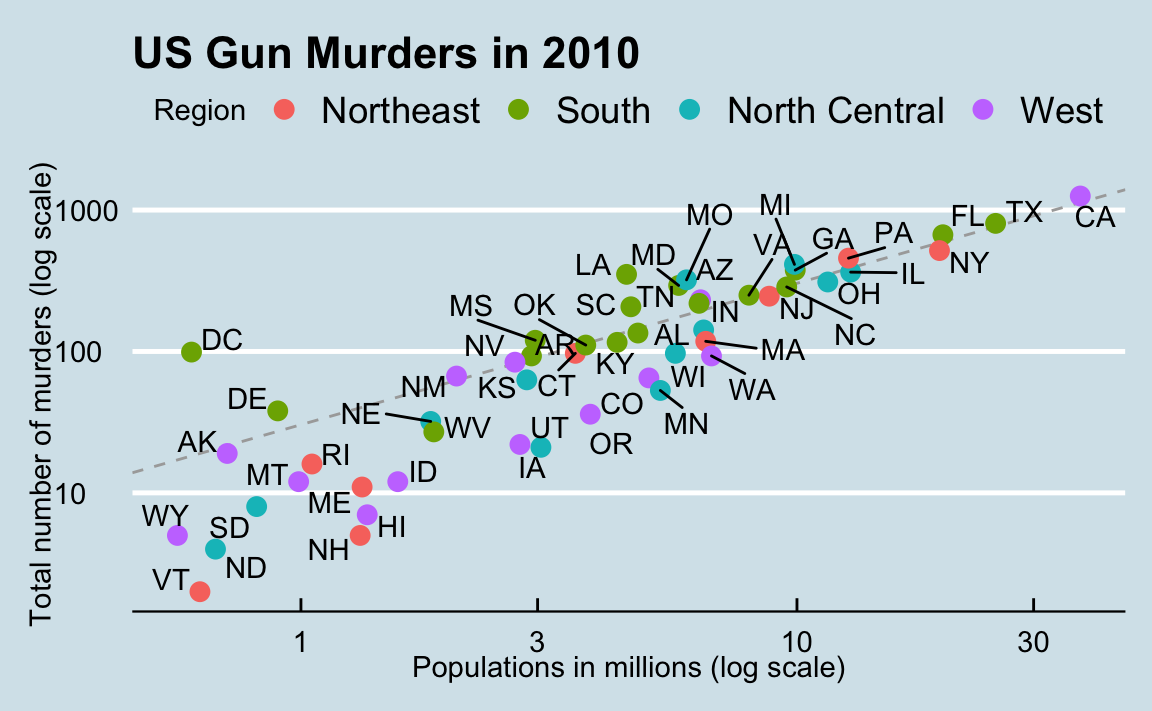

## References

Davies, TM (2016). The Book of R. No Starch Press

Irizarry, R (2020). Introduction to Data Science. CRC Press.

Wilkinson, L (2005). The Grammar of Graphics. Springer.

## Install and load `ggplot2`

You should also try this on your local computer and report back if you encounter any difficulties.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Use the command to load a package without an argument to see all packages currently loaded.

## Quick Plots
`ggplot2` has a quick plot function, `qplot()`, that works essentially like `plot()`. 

### Print coordinate vectors
Copy the following vector definitions into a code cell and run it.
```
foo <- c(1.1,2,3.5,3.9,4.2)
bar <- c(2,2.2,-1.3,0,0.2)
```

The function `ggplot2::qplot()` has the same syntax as the `plot()` function.
Plot `x=foo` and `y=bar`.

### Name the quick plot

Replot using `qplot()`, and this time title the plot `My lovely plot`, and name the axes `x axis label` and `y location` so that you can see the difference to the `plot()` layout.

### Difference to `plot()`

The generic base R function `plot()` creates a plot step by step. Instead, `ggplot2` creates graphic objects that remain static until you change the object itself. 

To show this, store `plot(foo,bar)` in a vector `baz`, and `qplot(foo,bar)` in an vector `qux`, and print them - each twice in a row.

You see that `baz` has the value `NULL`, while `qux` contains the graphical object and can be printed again and again.

## Components of a graph
We will construct the graph shown earlier. First, we break the graph apart in components:
- *Data:* the US `murders` data frame is summarized
- *Aesthetic mapping:* visual clues, like mapping of observations to x- and y-axis, color, data labels, region legend, overall style (here borrowed from the magazine The Economist).
- *Geometry:* the plot is a scatterplot
- *Scales:* both axes are log-scaled

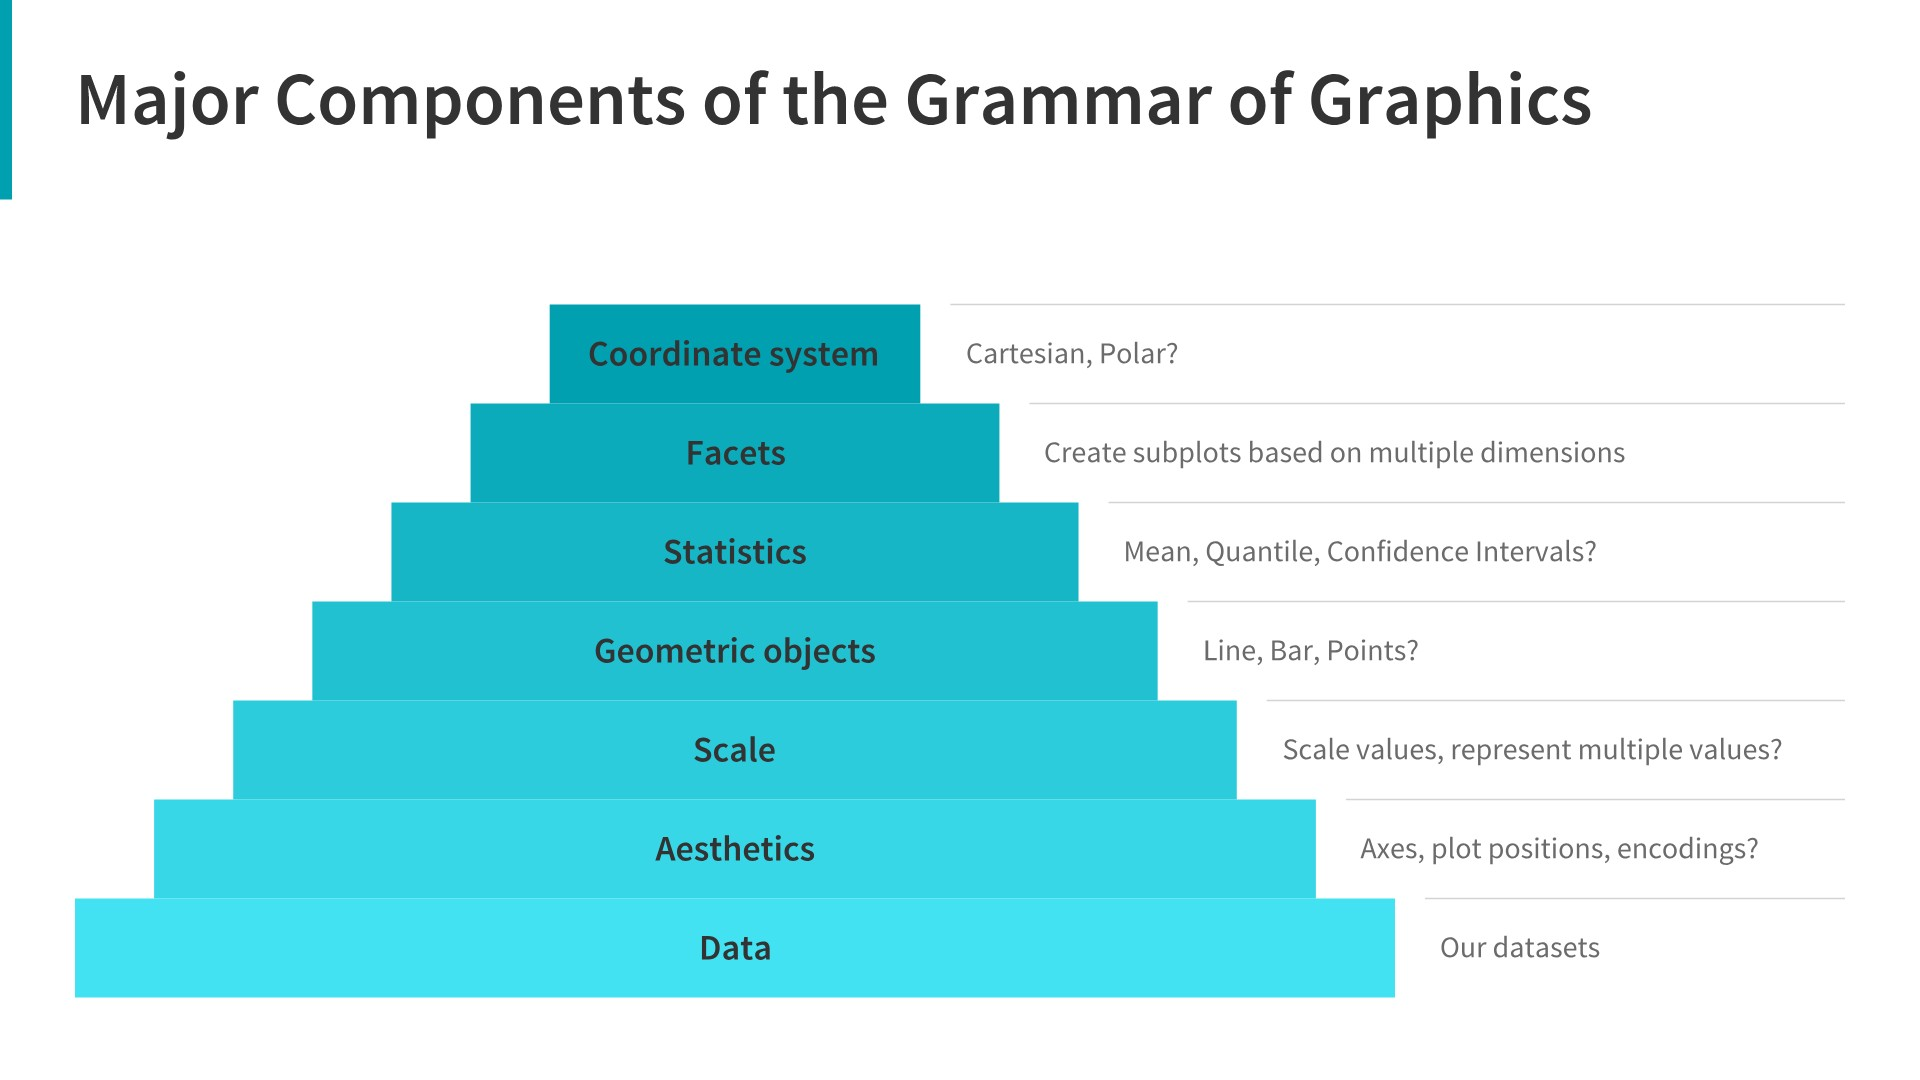

(Figure source: Sarkar, 2018)

## Get the data
The data are contained in the package `dslabs`. Install and the package and load the dataset `murders`, gun murder statistics by US state in 2010. 

Take a look at the structure and the first few rows of the data frame `murders`.

Take a look at the online data sheet for the dataset [here](https://rdrr.io/cran/dslabs/man/murders.html), and write in the next text cell when the documentation was uploaded.

**Answer:** dslabs documentation built on ... 

## Objects and pipes
We begin by creating a graph of the data using the `ggplot()` function
```
ggplot(data=murders)
```
Store the graph in an object `p`, print it, and check its `class`.

An alternative to saving the object is to "pipe" the data into the function using the pipe operator `|>`. Try this in the next code cell.
```
murders |> ggplot()
```

The output is a blank graph - because you have not defined the so-called *geometry* and the *aesthetic mapping* of the plot. These two are at the core of the "Grammar of Graphics" that was introduced by Leland Wilkinson (2005), and implemented in the [ggplot2 package](https://www.rdocumentation.org/packages/ggplot2/versions/3.3.5). Here is a [summary](https://cfss.uchicago.edu/notes/grammar-of-graphics/) of the original article by Wickham on this implementation.

*Note: in the literature, you'll mostly encounter the pipe operator `%>%` from the `margrittr` package. It is also part of the popular package `dplyr` for data frame table manipulation.*

## Geometries
`ggplot2` graphs are created using layers that are connected by the `+` symbol. The schematic looks like this
```
ggplot(data=DATA) + LAYER 1 + LAYER 2 + ... + LAYER N
```
Usually, the first layer defines the geometry - for scatterplots, that's the function `geom_point()`. All layout information for a plot is passed on to `ggplot()` as arguments to the geometry function.

Take a look at the [cheatsheet](https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf) to see the multitude of geometry functions available. Beauty comes at a price!


## Aesthetic mappings
The `aes()` function is used as the argument of a geometry function. It maps the data that we want to plot to the axes.

Copy the following command into a code cell and execute it.
```
ggplot(data=murders) +
      geom_point(
        aes(x = population/10^6,
            y = total))
```



What does this plot show? Put your answer in the next text cell.

**Answer:** the plot shows ... 

This is the plot that we will massage using a bunch more `ggplot2` functions, until we arrive at the final result suited for publication.

## Layers
We add labels to identify each point with its US state (`murders$abb`) using the `geom_text()` geometry. To emphasize the layer concept, we stick to the object notation (instead of the piping), and use the already defined graphical object `p`. Add the `geom_text()` function below to the `geom_point()` function like shown below, and add the `label=abb`.
```
p + geom_point(
      aes(x = population/10^6,
	   y = total)) +
    geom_text(aes(x = population/10^6,
	  y = total,
		label=abb))
```

Can you explain the value for the `label` attribute? Where does it come from?

**Answer:** `abb` is ... 

*Challenge:* Try to call `label=abb` outside of the `aes()` but inside the `geom_text()` function!

This last result is explained by the fact that the `aes()` function knows about the data, while `geom_text()` does not. If you use `murders$abb`, the command will work:

## Size is not a mapping[
We can change aesthetics like the size of the points using the `size` argument inside the geometry. `size` is not a *mapping*, because it does not use data from observations!

Copy the last command, and add the argument `size=3` to `geom_point()`.

This leads to a resizing of the points.

## Nudging is not a mapping either
Nudging the labels so that they don't obstruct the data points isn't a mapping either but merely a layout choice. 
Add `nudge_x=1.5` as an argument to the `geom_text()` function.

## Global aesthetic mapping
So far, we've had to duplicate the aesthetic mapping for each geometry. To avoid this, we need to let R know that added layers will *default* to our mapping. We redefine our plot object `p`. By defining a mapping inside `ggplot()`, it now applies globally. We then test this right away with our `size` and `nudge_x` parameters.
```
## define ggplot object and aesthetic mapping
p <- ggplot(data=murders,
	    aes(population/10^6,
		total,
		label=abb))

## add text label layer to the scatterplot and render
p + geom_point(size = 3) +
  geom_text(nudge_x = 1.5)
```

The result is the same as before, but now we can manipulate the layers more transparently.

## Local override
Local definitions override global definitions!

To demonstrate this, repeat the last command, but this time use the following `geom_text` function instead.
```
geom_text(x=10, y=800, label="Hello, world!")
```

## Log scale I
Log-scales are not the default. We add them with the `scale_x_continuous()` function. Add the following two lines to the graph, and also reduced the `nudge_x` factor to the value `0.05`.
```
 scale_x_continuous(trans = "log10")
 scale_y_continuous(trans = "log10")
```

## Log scale II
Logarithmic transformations are so common that there is a specialized function for it: replace the scaling functions by 
```
scale_x_log10()
scale_y_log10()
```


## Labels and titles
The functions to change labels and add a title are shown in the next code chunk - again, simply add the labels and the title as function layers.
```
xlab("Population in millions (log scale)")
ylab("US Gun Murders in 2010")
ggtitle("US Gun Murders in 2010")
```

Our plot is definitely shaping up nicely!

## Color I
`geom_point()` has a `color` argument. If we add it alongside `size`, all points will appear in that color. To demonstrate this, we redefine `p` by taking out the `geom_point()` layer.
```
## define ggplot object and aesthetic mapping
p <- ggplot(data=murders,
	    aes(population/10^6,
		total,
		label=abb)) +
  geom_text(nudge_x = 0.05) +
  scale_x_log10() +
  scale_y_log10() +
  xlab("Population in millions (log scale)") +
  ylab("US Gun Murders in 2010") +
  ggtitle("US Gun Murders in 2010")
```
And now we call `geom_point()` with the new argument.
```
## changing color for all points
p + geom_point(size = 3, color ="blue")
```

## Color II
This is not what we want. Instead, we use `aes()` inside `geom_point()` to define an aesthetic mapping (since the color corresponds to data) using the `factor` vector `murders$region`. This adds a third dimension to the plot.
```
p + geom_point(aes(col = region),
	       size = 3)
```

In [ ]:
##

The coordinate point mappings are inherited. `aes()` is expected to be the first argument of `geom_point()`. The legend showing the mapping of `color` to `region` is added automatically. To switch it off, you can add the argument `show.legend=FALSE` to `geom_point()`.

## More
There is a lot more you can do here. E.g. to add a line like with the Base-R function `abline`, you can add a layer `geom_abline()`. To compute the `intercept` and `slope` values, we can use the `dplyr` functions `summarize()` and `pull()` - the line in the final plot represents the average murder rate for the whole country.

To make changes to the legend, you can use the `scale_color_discrete geometry`.

For a "quick" overview (never quick, because there are so many functions in the package), you can check the `ggplot2` cheat sheet from RStudio.

You can change the overall theme with the package `ggthemes`, e.g. to change the style to The Economist magazine style:
```
library(ggthemes)
p + theme_economist()
```
An alternative geometry to nudging the labels is `geom_text_repel()`, part of the `ggrepel` package.

In the next section, we use all of these to make the final plot.

## Putting it all together
Enter this code in the code cell and execute it.
```
## install packages
install.packages("ggthemes")
install.packages("ggrepel")

## load data libraries
library(dslabs)
data(murders)

## load plotting libraries
library(ggplot2)   # improved plotting
library(ggthemes)  # improved plot theme
library(ggrepel)   # improved text labels

ggplot(data=murders,
       aes(population/10^6,
	   total,
	   label = abb)) +
  geom_point(aes(col=region),
	     size = 3) +
  geom_text_repel() +
  scale_x_log10() +
  scale_y_log10() +
  xlab("Population in millions (log scale)") +
  ylab("Total number of murders (log scale)") +
  ggtitle("US Gun Murders in 2010") +
  scale_color_discrete(name = "Region") +
  theme_economist()
```


## References

- Davies (2016). Book of R chapter 7. NoStarch Press.
- Grolemund/Wickham (2016). R for Data Science. O'Reilly. Online: had.co.nz
- Irizarry (2020). Introduction to Data Science Chapter 7: ggplot2. CRC Press. [Online: rafalab.github.io](https://rafalab.github.io/dsbook/introduction-to-data-visualization.html)
- Kumar (2020). Grid and Lattice Packages in R Programming. [Online: geeksforgeeks.org](https://www.geeksforgeeks.org/grid-and-lattice-packages-in-r-programming/)
- Matloff (2020). TidyverseSkeptic. [Online: github.com](https://github.com/matloff/TidyverseSkeptic)
- Wickham (2014). Tidy data. Journal of Statistical Software 59(10). [Online: had.co.nz](https://r4ds.had.co.nz/) (preprint), `tidyr` [vignette](https://tidyr.tidyverse.org/articles/tidy-data.html)
- Sarkar (Sep 12, 2018). A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional Data. [URL: towardsdatascience.com](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)